In [1]:
import math
import numpy as np

In [2]:
N = 100
a = 0
b = 2 * math.pi
h = (b - a) / N

In [11]:
def f1(k):
    x_1 = 0.5 * math.pi
    x_2 = 0.7 * math.pi
    delta = 0.1 * math.pi
    
    return math.exp(-((k - 1) * h - x_1) * ((k - 1) * h - x_1) / delta / delta) + \
math.exp(-((k - 1) * h - x_2) * ((k - 1) * h - x_2) / delta / delta)
 
def f2(k):
    return 10 <= k <= 30

In [12]:
def my_method_step(u, r):
    result = np.zeros(len(u), np.double)
    for i in range(len(u)):
        result[i] = u[i - 2] * (r-1) * r * (1+r) / 6 + u[i - 1] * (2-r) * r * (1+r) / 2 + \
        u[i] * (2-r) * (1-r) * (1+r) / 2 - u[(i+1) % len(u)] * (2-r) * (1-r) * r / 6
    return result

Число куранта

In [52]:
r = 1

In [56]:
x = np.array([h * i for i in range(N + 1)], dtype = np.double)

u_0 = np.array([f2(i) for i in range(N + 1)], dtype = np.double)
answer = u_0
for _ in range(101):
    answer = my_method_step(answer, r)

In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

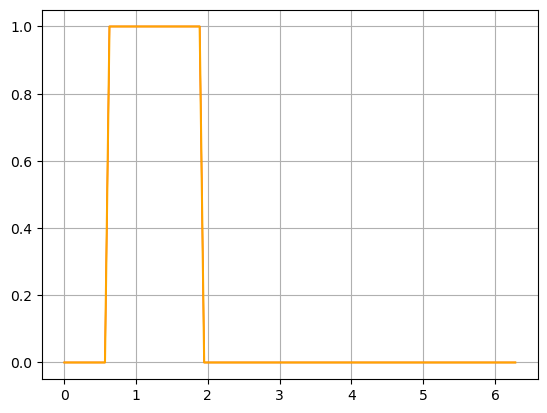

In [57]:
plt.plot(x, u_0, color = 'red', linewidth=1)
plt.plot(x, answer, color = 'orange')
plt.axis()
plt.grid()

plt.show

In [40]:
from PIL import Image

In [52]:
def animator(folder_name, cfl) -> None: 
    # Список для хранения кадров. 
    frames = [] 
 
    for frame_number in range(0, int(101 / cfl), 5): 
        # Открываем изображение каждого кадра. 
        frame = Image.open(f'./{folder_name}/{frame_number}.png') 
        # Добавляем кадр в список с кадрами. 
        frames.append(frame) 
 
    # Берем первый кадр и в него добавляем оставшееся кадры. 
    frames[0].save( 
        f'Shema_{cfl}.gif', 
        save_all=True, 
        append_images=frames[1:],  # Срез который игнорирует первый кадр. 
        optimize=True, 
        duration=200, 
        loop=0 
    )

In [42]:
cfls = [1, 0.9, 0.5, 0.3, 0.1, 0.99]

In [54]:
x = np.array([h * i for i in range(N + 1)], dtype = np.double)
u_0 = np.array([f1(i) for i in range(N + 1)], dtype = np.double)


In [55]:
for cfl in cfls:
    answer = u_0
    for i in range(int(101 / cfl)):
        if i % 5 == 0:
            plt.plot(x, answer, color = 'red', label = f'step {i}')
            plt.legend(loc=1)
            plt.axis(ymax = 1.1)
            plt.grid()
        
            plt.savefig(f'./{cfl}/{i}.png')
            plt.close()
        
        answer = my_method_step(answer, cfl)
    
    animator(f"{cfl}", cfl)
    

In [49]:
def animator2(folder_name, cfl) -> None: 
    # Список для хранения кадров. 
    frames = [] 
 
    for frame_number in range(0, int(101 / cfl), 5): 
        # Открываем изображение каждого кадра. 
        frame = Image.open(f'./{folder_name}/{frame_number}.png') 
        # Добавляем кадр в список с кадрами. 
        frames.append(frame) 
 
    # Берем первый кадр и в него добавляем оставшееся кадры. 
    frames[0].save( 
        f'Shema2_{cfl}.gif', 
        save_all=True, 
        append_images=frames[1:],  # Срез который игнорирует первый кадр. 
        optimize=True, 
        duration=200, 
        loop=0 
    )

In [50]:
x = np.array([h * i for i in range(N + 1)], dtype = np.double)
u_0 = np.array([f2(i) for i in range(N + 1)], dtype = np.double)


In [51]:
for cfl in cfls:
    answer = u_0
    for i in range(int(101 / cfl)):
        if i % 5 == 0:
            plt.plot(x, answer, color = 'red', label = f'step {i}')
            plt.legend(loc=1)
            plt.axis(ymax = 1.1)
            plt.grid()
        
            plt.savefig(f'./{cfl}_2/{i}.png')
            plt.close()
        
        answer = my_method_step(answer, cfl)
    
    animator2(f"{cfl}_2", cfl)
    